<a href="https://colab.research.google.com/github/SMAHAM/Scene-Recognization/blob/master/scene_reorganization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal scene reorganization for audio Categorization

## Stats

### Number of classes = 10


```
class_labels=[
'air_conditioner',
'car_horn',
'children_playing',
'dog_bark',
'drilling',
'engine_idling',
'gun_shot',
'jackhammer',
'siren',
'street_music'
]
```


### Number of files in total


```
   1302 json
   1302 csv
    925 wav
    181 mp3
    106 flac
     58 aif
     28 aiff
      4 ogg
```

---

### air_conditioner

```
     64 json
     64 csv
     39 wav
     12 flac
     10 mp3
     2 aif
     1 aiff
```

---
### car_horn

```
    125 json
    125 csv
    104 wav
     11 mp3
      4 flac
      3 aiff
      2 aif
      1 ogg
```

---
### children_playing
```
    158 json
    158 csv
    121 wav
     16 mp3
      9 aif
      6 flac
      5 aiff
      1 ogg
```
---
### dog_bark

```
    337 json
    337 csv
    221 wav
     54 mp3
     37 flac
     16 aif
      8 aiff
      1 ogg
```
---
### drilling
```
    119 json
    119 csv
     88 wav
     12 flac
     11 mp3
      5 aiff
      3 aif
```
---
### engine_idling
```
     97 json
     97 csv
     67 wav
     10 mp3
      9 flac
      9 aif
      2 aiff
```
---
### gun_shot
```
    117 json
    117 csv
     94 wav
     17 mp3
      4 flac
      2 aif
```
---
### jackhammer
```
     45 json
     45 csv
     31 wav
      7 flac
      4 aif
      2 mp3
      1 aiff
```
---
### siren
```
     74 json
     74 csv
     60 wav
      7 aif
      5 mp3
      1 ogg
      1 flac
```
---
### street_music
```
    166 json
    166 csv
    100 wav
     45 mp3
     14 flac
      4 aif
      3 aiff
 ```

In [0]:
#to find stats
#!find ./ -type f | rev | cut -d. -f1 | rev  | tr '[:upper:]' '[:lower:]' | sort | uniq --count | sort -rn
#number of files in a directory
#ls -q | wc -l

In [0]:
#list of labels
class_labels=[
'air_conditioner',
'car_horn',
'children_playing',
'dog_bark',
'drilling',
'engine_idling',
'gun_shot',
'jackhammer',
'siren',
'street_music'
]

In [4]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Installation of required librearies

In [5]:
#apt install axel
!pip3 install librosa
!pip install download

# Import Libraries

In [0]:
import os
import glob
import json
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import pandas as pd
from PIL import Image
%matplotlib inline
# For plotting headlessly
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from download import download

In [0]:
#connecting to drive
#from google.colab import drive
#drive.mount('/content/gdrive')
#Store the sampling rate as `sr`
#sr = 44100
# ---Set the hop length; at 22050 Hz, 512 samples ~= 23ms
#hop_length = 512

# File downloader

In [7]:
#whole dataset
#!axel -n 10 https://zenodo.org/record/1206938/files/UrbanSound.tar.gz

url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/air_conditioner/13230.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/air_conditioner/13230.csv'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/car_horn/2937.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/car_horn/2937.csv'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/children_playing/13579.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/children_playing/13579.csv'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/dog_bark/344.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/dog_bark/344.csv'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/drilling/518.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/drilling/518.csv'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/engine_idling/6988.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/engine_idling/6988.csv'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/gun_shot/7060.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/gun_shot/7060.csv'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/jackhammer/24728.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/jackhammer/24728.csv'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/siren/16772.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/siren/16772.csv'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/street_music/6508.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/street_music/6508.csv'
download(url,'./'+url.rsplit('/', 1)[-1])

file_sizes: 100%|████████████████████████████| 981k/981k [00:00<00:00, 11.7MB/s]


Successfully downloaded file to ./13230.mp3



file_sizes: 100%|████████████████████████████| 37.0/37.0 [00:00<00:00, 37.3kB/s]


Successfully downloaded file to ./13230.csv



file_sizes: 100%|████████████████████████████| 145k/145k [00:00<00:00, 4.03MB/s]


Successfully downloaded file to ./2937.wav



file_sizes: 100%|████████████████████████████| 29.0/29.0 [00:00<00:00, 8.51kB/s]


Successfully downloaded file to ./2937.csv



file_sizes: 100%|██████████████████████████| 6.54M/6.54M [00:00<00:00, 54.9MB/s]


Successfully downloaded file to ./13579.mp3



file_sizes: 100%|████████████████████████████| 39.0/39.0 [00:00<00:00, 13.4kB/s]


Successfully downloaded file to ./13579.csv



file_sizes: 100%|████████████████████████████| 933k/933k [00:00<00:00, 12.5MB/s]


Successfully downloaded file to ./344.wav



file_sizes: 100%|██████████████████████████████| 174/174 [00:00<00:00, 70.8kB/s]


Successfully downloaded file to ./344.csv



file_sizes: 100%|████████████████████████████| 918k/918k [00:00<00:00, 12.7MB/s]


Successfully downloaded file to ./518.wav



file_sizes: 100%|████████████████████████████| 30.0/30.0 [00:00<00:00, 50.0kB/s]


Successfully downloaded file to ./518.csv



file_sizes: 100%|████████████████████████████| 437k/437k [00:00<00:00, 7.13MB/s]


Successfully downloaded file to ./6988.mp3



file_sizes: 100%|████████████████████████████| 35.0/35.0 [00:00<00:00, 25.4kB/s]


Successfully downloaded file to ./6988.csv



file_sizes: 100%|██████████████████████████| 1.33M/1.33M [00:00<00:00, 15.3MB/s]


Successfully downloaded file to ./7060.wav



file_sizes: 100%|████████████████████████████| 87.0/87.0 [00:00<00:00, 26.7kB/s]


Successfully downloaded file to ./7060.csv



file_sizes:  20%|█████▏                    | 4.09M/20.3M [00:00<00:00, 38.0MB/s]

file_sizes: 100%|███████████████████████████| 20.3M/20.3M [00:00<00:00, 111MB/s]


Successfully downloaded file to ./24728.wav



file_sizes: 100%|██████████████████████████████| 194/194 [00:00<00:00, 54.5kB/s]


Successfully downloaded file to ./24728.csv



file_sizes: 100%|████████████████████████████| 376k/376k [00:00<00:00, 7.40MB/s]


Successfully downloaded file to ./16772.wav


file_sizes: 100%|████████████████████████████| 26.0/26.0 [00:00<00:00, 12.9kB/s]


Successfully downloaded file to ./16772.csv



file_sizes: 100%|████████████████████████████| 600k/600k [00:00<00:00, 8.12MB/s]


Successfully downloaded file to ./6508.mp3



file_sizes: 100%|████████████████████████████| 69.0/69.0 [00:00<00:00, 80.5kB/s]


Successfully downloaded file to ./6508.csv


'./6508.csv'

## Converting second intervals to bit intervals

In [0]:
# returns list of starts and ends for each segments
def segment(sig,start,end,sr=44100,window=2,stride_ratio=0.5, offset =-1,min_sig=0.5):
  
  """Returns a list of starts and ends for sound segments."""
  
  
  starts_ends = []
  start_sec = start
  end_sec = end
  #print('start:',start_sec,'sec =',start)
  #print('end:',end_sec,'sec =',end)
  
  if (start>end):
    (start,end)=(end,start)
  if (start<=0 or start>len(sig)/sr):
    start = 0
  else:
    start = int(start*sr)
  if (end==-1 or end>len(sig)/sr):
    end = len(sig)
  else:
    end = int(end*sr)
    
  print(f'end: {end}')
  seg_len = window * sr
  print(f'signal rate: {sr}')
  print(f'window (segment) length: {window} seconds ({seg_len} bits)')
  stride_step = int(seg_len*stride_ratio)
  print(f'stride step: {stride_step} bits')
  #sig_len = len(sig)
  print(f'offset: {offset}')
  
  if (len(sig) < seg_len):
    starts_ends.append([start, end])
  else:
    
    if (offset >0):
      max_offset = int((1- min_sig)*seg_len)
      offset = min(int(offset*seg_len),max_offset)
      start_orig = start
      start = max(start-offset,0)
      offset = start_orig - start
      print(f'offset: {offset}')
      print(f'start with offset: {start}')
    
    # Creating multiple window_size segments from a larger than window interval
    k=0
    #while(start+(k+1)*seg_len<=min(end,len(sig))+stride_ratio*seg_len):
    while(True):
      new_start = start+k*stride_step
      new_end = new_start+seg_len
      if(new_end > len(sig)):
        new_end = len(sig)
      # minimum singnal bits should be min_sig ratio of segment length  
      min_bits = int(min_sig * seg_len)
      if any([(new_end-new_start) < min_bits,
               (end - new_start) < min_bits]):
        break
      else:
        starts_ends.append([new_start, new_end])
        k=k+1
        
  #for i in starts_ends:
  #  print('start:',i[0])
  #  print('end:',i[1])
  return(starts_ends)

In [0]:
def zero_pad(sig, window_bits):
  
  """Returns a zero padded signal based on signal and necessary window_bits."""
  
  zero_pads = window_bits - len(sig)
  #print('zero_pads:', zero_pads)
  if np.all([zero_pads>0, window_bits>0,len(sig)<window_bits]):
    sig = np.pad(sig, (0, zero_pads), 'constant', constant_values=0)
  return sig
  

# MFCC generator

In [0]:
def make_mfcc(filename,store_path='./',num=1,label='class',
              start=-1,end=-1, window=-1,stride_ratio=0.5,min_sig=.5,
              offset=-1,fig_size =5,sr=44100,hop_length=512,n_mfcc = 13,show=False):
  file_name = os.path.splitext(os.path.basename(filename))[0]
  
  
  print(f'\nclass: {label}')
  print(f'file number: {file_name}')
  fig = plt.Figure(figsize=(fig_size,fig_size))
  canvas = FigureCanvas(fig)
  ax = fig.add_subplot(111)
  ax.axis('off')
  sig, rate = librosa.load(filename, sr=sr)
  print(f'The length of main signal is {round(len(sig)/sr,4)} seconds ({len(sig)} bits)')
  
  window_bits = window*sr
  segments = segment(sig=sig,start=start,end=end,sr=rate,window=window,
                     stride_ratio=stride_ratio,offset=offset,min_sig=min_sig)
  
  #y = zero_pad(y,bits)

  
  #if (window>0):
  #  if (len(y)<window*sr):
  #    y = zero_pad(y,window*sr)
  
  for s in segments:

    y=sig[s[0]:s[1]]
    pure_bits = len(y)
    y=zero_pad(y,window_bits)
    mfcc = librosa.feature.mfcc(y=y, sr=rate, hop_length=hop_length, n_mfcc=n_mfcc)
    mfcc_result = librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length, ax=ax)
    #img_name = label+'_'+file_name+'_seg_'+str(num)+'_p_'+str(p)+'_mfcc.png'
    start_time = "{:08.4F}".format(round(s[0]/sr,4))
    end_time = "{:08.4F}".format(round(s[1]/sr,4))
    
    transfer = 'mfcc'
    img_name = f'{label}-{transfer}-{file_name}-{start_time}-{end_time}.png'

    
    fig.savefig(store_path+img_name)
    img = Image.open(store_path+img_name)
    rate = int(fig_size/5)
    left = rate*50
    right = left + 256 * rate
    crop_area = (left, left, right, right)
    cropped_img = img.crop(crop_area)
    plt.axis('off')
    if (show):
      imgplot = plt.imshow(cropped_img)
    cropped_img.save(store_path+img_name)
    print(f'\nMFCC image: {img_name}')
    #print('The size of extracted signal is: ',len(y),'\n')
    print(f'pure bits: {pure_bits} ({round(pure_bits/sr,4)} secs)')
    print(f'total bits: {len(y)}, {round(len(y)/sr,4)} secs')
    print(f'extracted signal: {s[0]}({start_time} sec) to {s[1]}({end_time} sec)\n')

# STFT generator

In [0]:
def make_stft(filename,store_path='./',num=1,label='class',start=-1,end=-1,fig_size =5,sr=44100,hop_length=512,window_size = 1024,show=False):
  file_name = os.path.splitext(os.path.basename(filename))[0]
  print('\nclass = ', label)
  print('file number = ',file_name)
  fig = plt.Figure(figsize=(fig_size,fig_size))
  canvas = FigureCanvas(fig)
  ax = fig.add_subplot(111)
  ax.axis('off')
  sig, rate = librosa.load(filename, sr=sr)
  start,end = segment(sig,start,end)
  y=sig[start:end]
  window = np.hanning(window_size)
  stft  = librosa.core.spectrum.stft(y=y, n_fft=window_size, hop_length=hop_length, window=window)
  out = 2 * np.abs(stft) / np.sum(window)

  stft = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
  img_name = label+'_'+file_name+'_'+str(num)+'_stft.png'
  fig.savefig(store_path+img_name)
  img = Image.open(store_path+img_name)
  rate = int(fig_size/5)
  left = rate*50
  right = left + 256 * rate
  crop_area = (left, left, right, right)
  cropped_img = img.crop(crop_area)
  plt.axis('off')
  if (show):
    imgplot = plt.imshow(cropped_img)
  cropped_img.save(store_path+img_name)
  print('The length of main signal is',round(len(sig)/sr,4),'seconds')
  print('The STFT file is created: '+img_name)
  print('The size of main signal is: ',len(sig))
  print('The size of extracted signal is: ',len(y))

# Air Conditioner 

## MFCC

In [64]:
cd /content

/content



class: air_conditioner
file number: 13230
The length of main signal is 61.2833 seconds (2702592 bits)
end: 661500
signal rate: 44100
window (segment) length: 2 seconds (88200 bits)
stride step: 44100 bits
offset: 0.9
offset: 0
start with offset: 0

MFCC image: air_conditioner-mfcc-13230-000.0000-002.0000.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 0(000.0000 sec) to 88200(002.0000 sec)


MFCC image: air_conditioner-mfcc-13230-001.0000-003.0000.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 44100(001.0000 sec) to 132300(003.0000 sec)


MFCC image: air_conditioner-mfcc-13230-002.0000-004.0000.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 88200(002.0000 sec) to 176400(004.0000 sec)


MFCC image: air_conditioner-mfcc-13230-003.0000-005.0000.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 132300(003.0000 sec) to 220500(005.0000 sec)


MFCC image: air_conditioner-mf

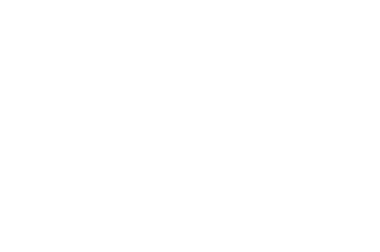

In [107]:
make_mfcc('13230.mp3', label ='air_conditioner', window=2,
          stride_ratio=.5, offset = .9,start=0, end=15,min_sig=.8,
          store_path='/content/',show=False)

In [0]:
!rm *.png

In [102]:
 pwd

'/content'

## STFT


class =  air_conditioner
file number =  13230
start: 2.1112 sec = 93103
end: 4.1112 sec = 181303
The length of main signal is 61.2833 seconds
The STFT file is created: air_conditioner_13230_1_stft.png
The size of main signal is:  2702592
The size of extracted signal is:  88200


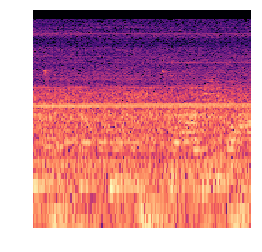

In [0]:
make_stft('13230.mp3', label ='air_conditioner', start=2.1112, end=4.1112, store_path='/content/',show=True)

# Car Horn

## MFCC


class: car_horn
file number: 2937
The length of main signal is 0.8192 seconds (36128 bits)
end: 36128
signal rate: 44100
window (segment) length: 2 seconds (88200 bits)
stride step: 44100 bits
offset: 1

MFCC image: car_horn-mfcc-2937-0.0000-0.8192.png
pure bits: 36127 (0.8192 secs)
total bits: 88200, 2.0 secs
extracted signal: 1(0.0000 sec) to 36128(0.8192 sec)



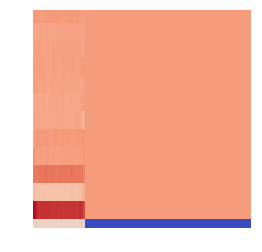

In [39]:
make_mfcc('2937.wav', label ='car_horn', offset=1, stride_ratio=.5, min_sig=.5,window=2, start=0, end=10, store_path='/content/',show=True)

## STFT


class =  car_horn
file number =  2937
start: 2.1112 sec = 0
end: 4.1112 sec = 36128
The length of main signal is 0.8192 seconds
The STFT file is created: car_horn_2937_1_stft.png
The size of main signal is:  36128
The size of extracted signal is:  36128


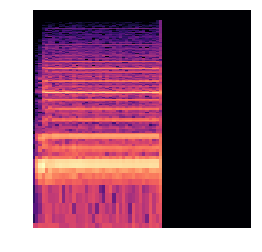

In [0]:
make_stft('2937.wav', label ='car_horn', start=2.1112, end=4.1112, store_path='/content/',show=True)

# Siren


class: siren
file number: 16772
The length of main signal is 2.1301 seconds (93937 bits)
end: 93937
signal rate: 44100
window (segment) length: 2 seconds (88200 bits)
stride step: 44100 bits
offset: 0.5
offset: 6823
start with offset: 1

MFCC image: siren-mfcc-16772-0.0000-2.0000.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 1(0.0000 sec) to 88201(2.0000 sec)


MFCC image: siren-mfcc-16772-1.0000-2.1301.png
pure bits: 49836 (1.1301 secs)
total bits: 88200, 2.0 secs
extracted signal: 44101(1.0000 sec) to 93937(2.1301 sec)



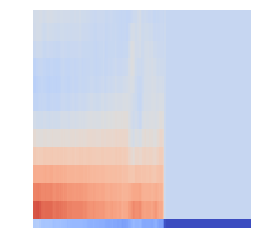

In [41]:
make_mfcc('16772.wav', label ='siren',offset=0.5, stride_ratio=.5, window=2, start=0.154754, end=2.130091, store_path='/content/',show=True)

# Street music


class: street_music
file number: 6508
The length of main signal is 34.0 seconds (1499400 bits)
signal rate: 44100
window (segment) length: 2 seconds (88200 bits)
stride step: 44100 bits
offset: -1

MFCC image: street_music_6508_26.0817_28.0817_mfcc.png
extracted signal: 1150205 (26.0817 sec) to 1238405 (28.0817 sec) (88200 bits, 2.0 secs)


MFCC image: street_music_6508_27.0817_29.0817_mfcc.png
extracted signal: 1194305 (27.0817 sec) to 1282505 (29.0817 sec) (88200 bits, 2.0 secs)


MFCC image: street_music_6508_28.0817_30.0817_mfcc.png
extracted signal: 1238405 (28.0817 sec) to 1326605 (30.0817 sec) (88200 bits, 2.0 secs)


MFCC image: street_music_6508_29.0817_31.0817_mfcc.png
extracted signal: 1282505 (29.0817 sec) to 1370705 (31.0817 sec) (88200 bits, 2.0 secs)


MFCC image: street_music_6508_30.0817_32.0817_mfcc.png
extracted signal: 1326605 (30.0817 sec) to 1414805 (32.0817 sec) (88200 bits, 2.0 secs)


MFCC image: street_music_6508_31.0817_33.0817_mfcc.png
extracted signal: 137

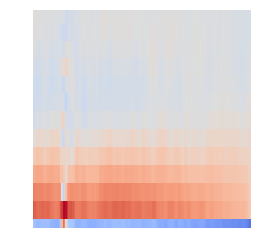

In [255]:
make_mfcc('6508.mp3', label ='street_music',stride_ratio=.5, window=2, start=26.081757, end=34.063673, store_path='/content/',show=True)

# Gun Shot


class: gun_shot
file number: 7060
The length of main signal is 7.54 seconds (332513 bits)
end: 329400
signal rate: 44100
window (segment) length: 2 seconds (88200 bits)
stride step: 4410 bits
offset: 0.7
offset: 61739
start with offset: 197112

MFCC image: gun_shot-mfcc-7060-4.4697-6.4697.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 197112(4.4697 sec) to 285312(6.4697 sec)


MFCC image: gun_shot-mfcc-7060-4.5697-6.5697.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 201522(4.5697 sec) to 289722(6.5697 sec)


MFCC image: gun_shot-mfcc-7060-4.6697-6.6697.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 205932(4.6697 sec) to 294132(6.6697 sec)


MFCC image: gun_shot-mfcc-7060-4.7697-6.7697.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 210342(4.7697 sec) to 298542(6.7697 sec)


MFCC image: gun_shot-mfcc-7060-4.8697-6.8697.png
pure bits: 88200 (2.0 secs)
total bits: 8

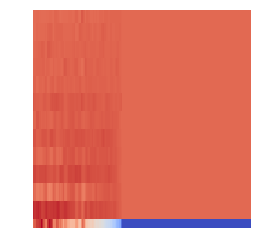

In [320]:
make_mfcc('7060.wav', label ='gun_shot',stride_ratio=.05,min_sig=.3, 
          offset=.7, window=2, start=5.869655, end=7.4694, 
          store_path='/content/',show=True)

In [0]:
!rm *.png

In [289]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Trace directories and store file names in json

In [0]:
#our data directory
cd /content/drive/Team\ Drives/ELE888_Syeda/UrbanSound

/content/drive/Team Drives/ELE888_Syeda/UrbanSound


In [45]:
path = '/content/drive/Team Drives/ELE888_Syeda/UrbanSound/data/'

# the tuple of sound types
sound_types = ('*.wav', '*.mp3','*.flac','*.aif','*.aiff','*.ogg') 
      
csv_dict= {}
json_dict ={}
filename_dict ={}
sound_dict ={}
#List of
for label in class_labels:
  os.chdir(path+label)
  csv_list = glob.glob('*.{}'.format('csv'))
  csv_dict[label] = sorted(csv_list)
  json_list = glob.glob('*.{}'.format('json'))
  json_dict[label] = sorted(json_list)
  filename_dict[label] = list(map(lambda each:each.strip(".csv"), csv_list))
  files_grabbed = []
  for files in sound_types:
    files_grabbed.extend(glob.glob(files))
  sound_dict[label] = sorted(files_grabbed)

print(filename_dict['air_conditioner'])
print(csv_dict['air_conditioner'])
print(json_dict['air_conditioner'])
print(sound_dict['air_conditioner'])

['100852', '101729', '121285', '121286', '119067', '13230', '127872', '127873', '134717', '146690', '146709', '146714', '146845', '147926', '151977', '153261', '159761', '165454', '162103', '167464', '166942', '170022', '170245', '177621', '177726', '177729', '177742', '178686', '184805', '189023', '185709', '189981', '189982', '189987', '189985', '189988', '189986', '189989', '189991', '195969', '202516', '202517', '204240', '35382', '30204', '50901', '55018', '47160', '54383', '57320', '56385', '58806', '60846', '59277', '62461', '63724', '73524', '74507', '74677', '75743', '79089', '83502', '80589', '85569']
['100852.csv', '101729.csv', '119067.csv', '121285.csv', '121286.csv', '127872.csv', '127873.csv', '13230.csv', '134717.csv', '146690.csv', '146709.csv', '146714.csv', '146845.csv', '147926.csv', '151977.csv', '153261.csv', '159761.csv', '162103.csv', '165454.csv', '166942.csv', '167464.csv', '170022.csv', '170245.csv', '177621.csv', '177726.csv', '177729.csv', '177742.csv', '17

In [0]:
cd /content/drive/Team\ Drives/ELE888_Syeda/UrbanSound

/content/drive/Team Drives/ELE888_Syeda/UrbanSound


In [0]:
#storing file names in json files
#json.dump( sound_dict, open( "sound_dict.json", 'w' ) )
#json.dump( csv_dict, open( "csv_dict.json", 'w' ) )
#json.dump( json_dict, open( "json_dict.json", 'w' ) )

# Creating all MFCCs

In [0]:
cd /content/drive/Team\ Drives/ELE888_Syeda/UrbanSound/mfcc/

/content/drive/Team Drives/ELE888_Syeda/UrbanSound/mfcc



class: air_conditioner
file number: 100852
The length of main signal is 64.7053 seconds (2853504 bits)
end: 2853503
signal rate: 44100
window (segment) length: 2 seconds (88200 bits)
stride step: 44100 bits
offset: 0.5
offset: 0
start with offset: 0

MFCC image: air_conditioner-mfcc-100852-000.0000-002.0000.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 0(000.0000 sec) to 88200(002.0000 sec)


MFCC image: air_conditioner-mfcc-100852-001.0000-003.0000.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 44100(001.0000 sec) to 132300(003.0000 sec)


MFCC image: air_conditioner-mfcc-100852-002.0000-004.0000.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 88200(002.0000 sec) to 176400(004.0000 sec)


MFCC image: air_conditioner-mfcc-100852-003.0000-005.0000.png
pure bits: 88200 (2.0 secs)
total bits: 88200, 2.0 secs
extracted signal: 132300(003.0000 sec) to 220500(005.0000 sec)


MFCC image: air_conditio

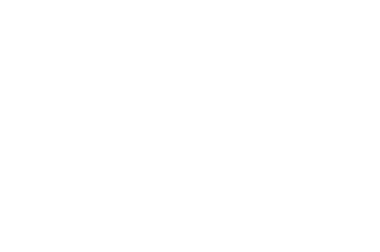

In [115]:
#air_conditioner: offset = 0.5,stride_ratio=0.5,min_sig=0.4
#car_horn: offset = 0.8,stride_ratio=0.2,min_sig=0.2
#children_playing: offset = 0.5,stride_ratio=0.5,min_sig=0.4
#dog_bark: offset = 0.5,stride_ratio=0.5,min_sig=0.4
#drilling: offset = 0.5,stride_ratio=0.5,min_sig=0.4
#engine_idiling: offset = 0.5,stride_ratio=0.5,min_sig=0.4
#gun_shot: offset = 0.8,stride_ratio=0.2,min_sig=0.2
#jack_hammer: offset = 0.5,stride_ratio=0.5,min_sig=0.4
#siren: offset = 0.5,stride_ratio=0.5,min_sig=0.4
#street_music: offset = 0.5,stride_ratio=0.5,min_sig=0.4

#generate all MFCCs
store_path = '/content/drive/Team Drives/ELE888_Syeda/UrbanSound/mfcc/'
data_path = '/content/drive/Team Drives/ELE888_Syeda/UrbanSound/data/'
class_labels = ['air_conditioner']
settings = {'window':2,'offset':0.5,'stride_ratio':0.5,'min_sig':0.4}
for label in class_labels:
  for sound in sound_dict[label]:
    csv=pd.read_csv(data_path+label+'/'+os.path.splitext(sound)[0]+'.csv', header=None)
    rows = csv.iloc[:, 0:2]
    for i in range(len(rows.index)):
      start= rows.iloc[i,0]
      end = rows.iloc[i,1]
      make_mfcc(data_path+label+'/'+sound, label =label, start=start, end=end,
                window = settings['window'],
                offset=settings['offset'],stride_ratio=settings['stride_ratio'],
                min_sig=settings['min_sig'],
                store_path=store_path+label+'/')
      

# MNIST code

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

In [15]:
window_size=884000
a = np.arange(1,9)
zero_pads = window_size- len(a)
a= np.pad(a, (0, zero_pads), 'constant', constant_values=0)
len(a)

884000

In [26]:
zero_pads= 5
bits =5
sig =[1,2,3]
if all([zero_pads>0, bits>0,len(sig)<bits]):
  print('hello')

hello


In [113]:
data = np.arange(250, 276)
nrows = int(np.ceil(len(data)/5))
print(nrows)
#fig, axs = plt.subplots(nrows,5, figsize=(15, 10), facecolor='white', edgecolor='k')
#fig.subplots_adjust(hspace = 0.5, wspace=.001)

#for ax, d in zip(axs.ravel(), data):

 #   ax.contourf(np.random.rand(10,10), 5, cmap=plt.cm.Oranges)
 #   ax.set_title(str(d))

    

6


In [174]:
format(round(14.0123,2), '.4f')

'14.0100'

In [28]:
cd mfcc

/content/drive/Team Drives/ELE888_Syeda/UrbanSound/mfcc


In [0]:
#for i in class_labels:
#  !mkdir $i

In [30]:
ls

air_conditioner/  children_playing/  drilling/       gun_shot/    siren/
car_horn/         dog_bark/          engine_idling/  jackhammer/  street_music/


In [112]:
cd /content/drive/Team Drives/ELE888_Syeda/UrbanSound/mfcc/

/content/drive/Team Drives/ELE888_Syeda/UrbanSound/mfcc


In [113]:
cd air_conditioner/

/content/drive/Team Drives/ELE888_Syeda/UrbanSound/mfcc/air_conditioner


In [0]:
rm *.png

In [67]:
a, b, c = 1.0033, 10.3334, 100.3332
for val in [a, b, c]:
    aaa = f'{val:09}'
    print(aaa)

0001.0033
0010.3334
0100.3332


In [96]:
start_time = round(35/2.333,4)
aaa= "{:07.4F}".format(start_time)
aaa

'15.0021'

In [0]:
print("{:07.3F}".format(a))